# 1. Tìm nghiệm tối ưu bằng hạ dốc (_gradient descent_)

Phương pháp hạ dốc (_gradient descent_) là một kỹ thuật quan trọng trong học máy và đặc biệt là học sâu, giúp ta tìm cực trị địa phương của mọi hàm số dựa trên gradient. Trên thực tế việc tìm ra được lời giải chính xác cho một số dạng hàm mất mát là không dễ dàng, đặc biệt là những hàm số có đạo hàm quá phức tạp và những hàm không lồi. Do đó _phương pháp hạ dốc_ là một trong những lựa chọn tốt nhất để tiến dần đến cực trị cho những bài toán như vậy. Tuy nhiên hạn chế của phương pháp này đó là cực trị tìm được chỉ là nghiệm gần đúng và không đảm bảo chắc chắn là cực trị toàn cục. 

Để hiểu về phương pháp hạ dốc là gì chúng ta sẽ cùng phân tích một ví dụ đơn giản đó là bài toán tìm cực trị của hàm $f(x) = x^2-2x+5$ .

Hàm này có đạo hàm là $f'(x) = 2x-2$

Không khó để phát hiện ra $f'(x)$ có nghiệm $x=1$ và là hàm lồi tại nghiệm đó nên nó có cực tiểu là $(x^*, y^*)=(1, 5)$.

Tiếp theo ta sẽ vẽ đồ thị của hàm số này.

In [1]:
import numpy as np

# Khởi tạo x
x = np.arange(-9, 11, 0.1)

def _f(x):
  return x**2-2*x+5

# Tính f(x)
y = _f(x)
# Đạo hàm f'(x)
y_grad = 2*x-2

# Lấy ra các điểm ngẫu nhiên
x0, y0 = x[10], y[10]
x1, y1 = x[-20], y[-20]

# Cực tiểu của hàm số
x_star=1
y_star=4

Vẽ đồ thị

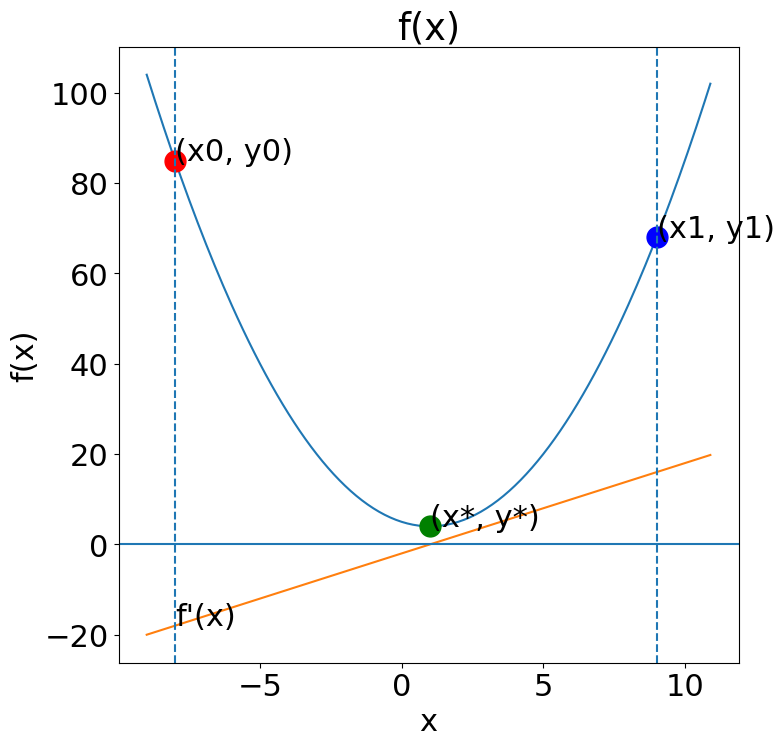

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.ylabel("f(x)")
plt.plot(x0, y0, marker="o", markersize=15, color="red")
plt.text(x0, y0, "(x0, y0)")
plt.plot(x1, y1, marker="o", markersize=15, color="blue")
plt.text(x1, y1, "(x1, y1)")
plt.text(x_star, y_star, "(x*, y*)")
plt.plot(x_star, y_star, marker="o", markersize=15, color="green")
plt.plot(x, y_grad, linestyle='-')
plt.axhline(0)
plt.axvline(x0, linestyle="--")
plt.axvline(x1, linestyle="--")
plt.text(x0, 2*x0-2, "f'(x)")
plt.xlabel("x")
plt.title("f(x)")
plt.show()

Từ đồ thị ta thấy điểm $(x_0, y_0)$ nằm ở bên trái điểm cực tiểu thì giá trị đạo hàm là âm. Để di chuyển tới $(x^*, y^*)$ thì ta phải **tăng** $x_0$.

Tương tự tại điểm $(x_1, y_1)$ nằm bên phải của điểm cực tiểu thì giá trị của đạo hàm sẽ dương. Để đi tới $(x^*, y^*)$ thì cần **giảm** $x_1$.

Như vậy trong cả hai trường hợp ta đều cần di chuyển ngược chiều đạo hàm để tiến gần hơn tới cực trị. Ta có thể cập nhật dần dần nghiệm sau mỗi bước bằng một hệ số học tập (_learning rate_) $\alpha$ có dạng như sau:

$$x_{new} := x_0-\alpha \nabla_{x} f(x_0)$$


Trong đó ký hiệu `a:=b` trong lập trình có nghĩa là chúng ta gán giá trị a bằng giá trị b. Còn nếu ta viết a=b có nghĩa rằng đây là một khẳng định thực tế rằng giá trị của a bằng với b.

Như vậy tại mọi vị trí, chỉ cần di chuyển ngược chiều của đạo hàm tại một điểm  một khoảng rất nhỏ thì **có khả năng rất cao** là ta sẽ thu được một giá trị nhỏ nhơn. 

Thế nhưng có khi nào di chuyển ngược chiều đạo hàm mà khiến giá trị $f(x)$ lớn hơn không? Đó là khi ta đã vượt dốc, chẳng hạn như khi đã đến rất gần điểm cực trị $(x^*, y^*)$ nhưng _hệ số học tập_ quá lớn làm cho khoảng thay đổi ở bước tiếp theo cũng lớn theo và là nguyên nhân khiến nghiệm cập nhật vượt quá điểm cực trị. Trường hợp này gọi là nhảy dốc (_Step Over_).


![](https://i.imgur.com/0g58QdZ.jpeg.jpeg)

**Hình 2:** Hình bên trái là chiến lược học tập được thiết lập với hệ số học tập phù hợp. Hình bên phải xảy ra hiện tượng _nhảy dốc_. Sau mỗi lượt cập nhật nghiệm thì các điểm có xu hướng nhảy qua lại hai bên xung quanh cực trị địa phương thay vì hội tụ từ từ.

Để hạn chế hiện tượng _nhảy dốc_ thì ta cần lựa chọn $\alpha$ rất nhỏ từ $0.001$ tới $0.005$ và áp dụng những phương pháp tối ưu (_optimizer_) khác nhau để kiểm soát quá trình huấn luyện. Một số phương pháp tối ưu phổ biến là `Adam, Ada, RMProp, ...` và hiện chúng đều đã có sẵn trong các framework Deep Learning.

## 1.1. Cập nhật gradient descent trên Logistic regression

Để tìm ra nghiệm của hồi qui Logistic thì chúng ta sẽ thực hiện cập nhật nghiệm trên từng điểm dữ liệu $(\mathbf{x}_i, y_i)$. Các điểm được lựa chọn một cách ngẫu nhiên ở mỗi lượt cập nhật. Phương pháp cập nhật gradient descent như vậy còn được gọi là _Stochastic Gradient Descent_.

$$\mathbf{w} := \mathbf{w} - \alpha ~ \frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} \tag{3}$$


Mặt khác:

$$\mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i) = -[y_i \log {\hat{y}}_i + (1-y_i) \log (1 - \hat{y}_i)]$$

Ngoài ra ta dễ dàng chứng minh được:

$$\begin{eqnarray}\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} & = & -[y_i \frac{\delta \log {\hat{y}}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{\delta \log \hat{y}_i}{\delta \hat{y}_i}\frac{\delta \hat{y}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \hat{y}_i} \frac{\delta \hat{y}_i}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{1}{\hat{y}_i} - (1-y_i) \frac{1}{(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \\
& = & - [\frac{y_i-\hat{y}_i}{\hat{y}_i(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \tag{4}
\end{eqnarray}$$

Dòng 1 suy ra dòng 2 là vì ta sử dụng công thức chain rule trong vi phân. Đặt $z = e^{-\mathbf{w}^{\intercal} \mathbf{x}}$. Tiếp tục khai triển:

$$\frac{\delta \hat{y}_i}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta z_i} \frac{\delta z_i}{\delta \mathbf{w}} = \frac{-1}{(1+z_i)^2} (-z_i\mathbf{x}_i) = -\mathbf{x}\frac{z_i}{(1+z_i)^2} = \mathbf{x}_i\hat{y}_i(1-\hat{y}_i)$$

Từ đó thế vào $(4)$ ta được:

$$\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} = \mathbf{x}_i (y_i-\hat{y}_i)$$

Như vậy công thức $(3)$ cập nhật nghiệm theo gradient descent sẽ được rút ngắn xuống thành:

$$\mathbf{w} := \mathbf{w} - \alpha ~ \mathbf{x}_i(y_i-\hat{y}_i)$$

Quá trình cập nhật nghiệm theo phương pháp _Stochastic Gradient Descent_ được thể hiện tại từng điểm như sau:

```
Loop {
  for i=1 to n, {
    for j=1 to m {
      w_j:=w_j - \alpha ~ \mathbf{x}_i(y_i-\hat{y}_i)
    }
  }
}
`
```

Trong đó $n$ là số quan sát và $m$ là số lượng trọng số mô hình (bao gồm cả hệ số tự do).

Một lưu ý khá quan trọng đó là các $w_i$ được cập nhật là đồng thời. Tức là ở cùng một quan sát, sau khi đã cập nhật $w_0$ thì chúng ta sẽ không lấy giá trị mới của $w_0$ để sử dụng vào cập nhật $w_1$.

# 2. Hồi qui Logistic trên sklearn

Để xây dựng mô hình hồi qui Logistic trên sklearn chúng ta sử dụng module [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Tiếp theo chúng ta sẽ cùng xây dựng một pipeline đơn giản cho bài toán phân loại nợ xấu sử dụng mô hình hồi qui Logistic. Dữ liệu đầu vào là [hmeq](http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv). Bộ dữ liệu HMEQ bao gồm các đặc trưng thông tin về nợ của 5960 khoản vay mua nhà. Đây là những khoản vay mua nhà mà người vay sử dụng vốn chủ sở hữu làm tài sản thế chấp. Tập dữ liệu bao gồm những trường sau:

* BAD: 1 = Hồ sơ vay là vi phạm hoặc mất khả năng trả nợ; 0 = hồ sơ vay đã và đang trả nợ.
* LOAN: Số tiền yêu cầu cho vay.
* MORTDUE: Số tiền đến hạn của khoản thế chấp hiện có.
* VALUE: Giá trị tài sản hiện tại.
* REASON: DebtCon = nợ hợp nhất; HomeImp = cải thiện nhà.
* JOB: Thể loại nghề nghiệp.
* YOJ: Số năm kinh nghiệm trong nghề nghiệp hiện tại.
* DEROG: Số lượng báo cáo không tín nhiệm.
* DELINQ: Số hạn mức tín dụng quá hạn.
* CLAGE: Tuổi của hạn mức tín dụng cũ nhất tính theo tháng.
* NINQ: Số câu hỏi tín dụng gần đây.
* CLNO: Số lượng hạn mức tín dụng.
* DEBTINC: Tỷ lệ nợ trên thu nhập.

Mục tiêu của chúng ta sẽ là dựa vào các biến đầu vào để phân loại một hồ sơ có khả năng nợ xấu hay không.

Như thông lệ, qui trình xây dựng mô hình sẽ bao gồm các bước theo tuần tự:

1. Khảo sát dữ liệu.
2. Phân chia tập huấn luyện/kiểm tra.
3. Xử lý missing và outliers.
4. Lựa chọn mô hình.
5. Huấn luyện mô hình.
6. Đánh giá mô hình.

Bên dưới chúng ta sẽ tuần tự thực hành những bước này:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

Đọc dữ liệu từ pandas

In [4]:
import pandas as pd

df = pd.read_csv('http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv', header = 0, sep = ',')
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Vẽ biểu đồ khảo sát phân phối của dữ liệu.

number of numeric field:  11


C:\Users\thong\AppData\Local\Temp\ipykernel_11812\1017421402.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
C:\Users\thong\AppData\Local\Temp\ipykernel_11812\1017421402.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
C:\Users\thong\AppData\Local\Temp\ipykernel_11812\10

Error CLNO


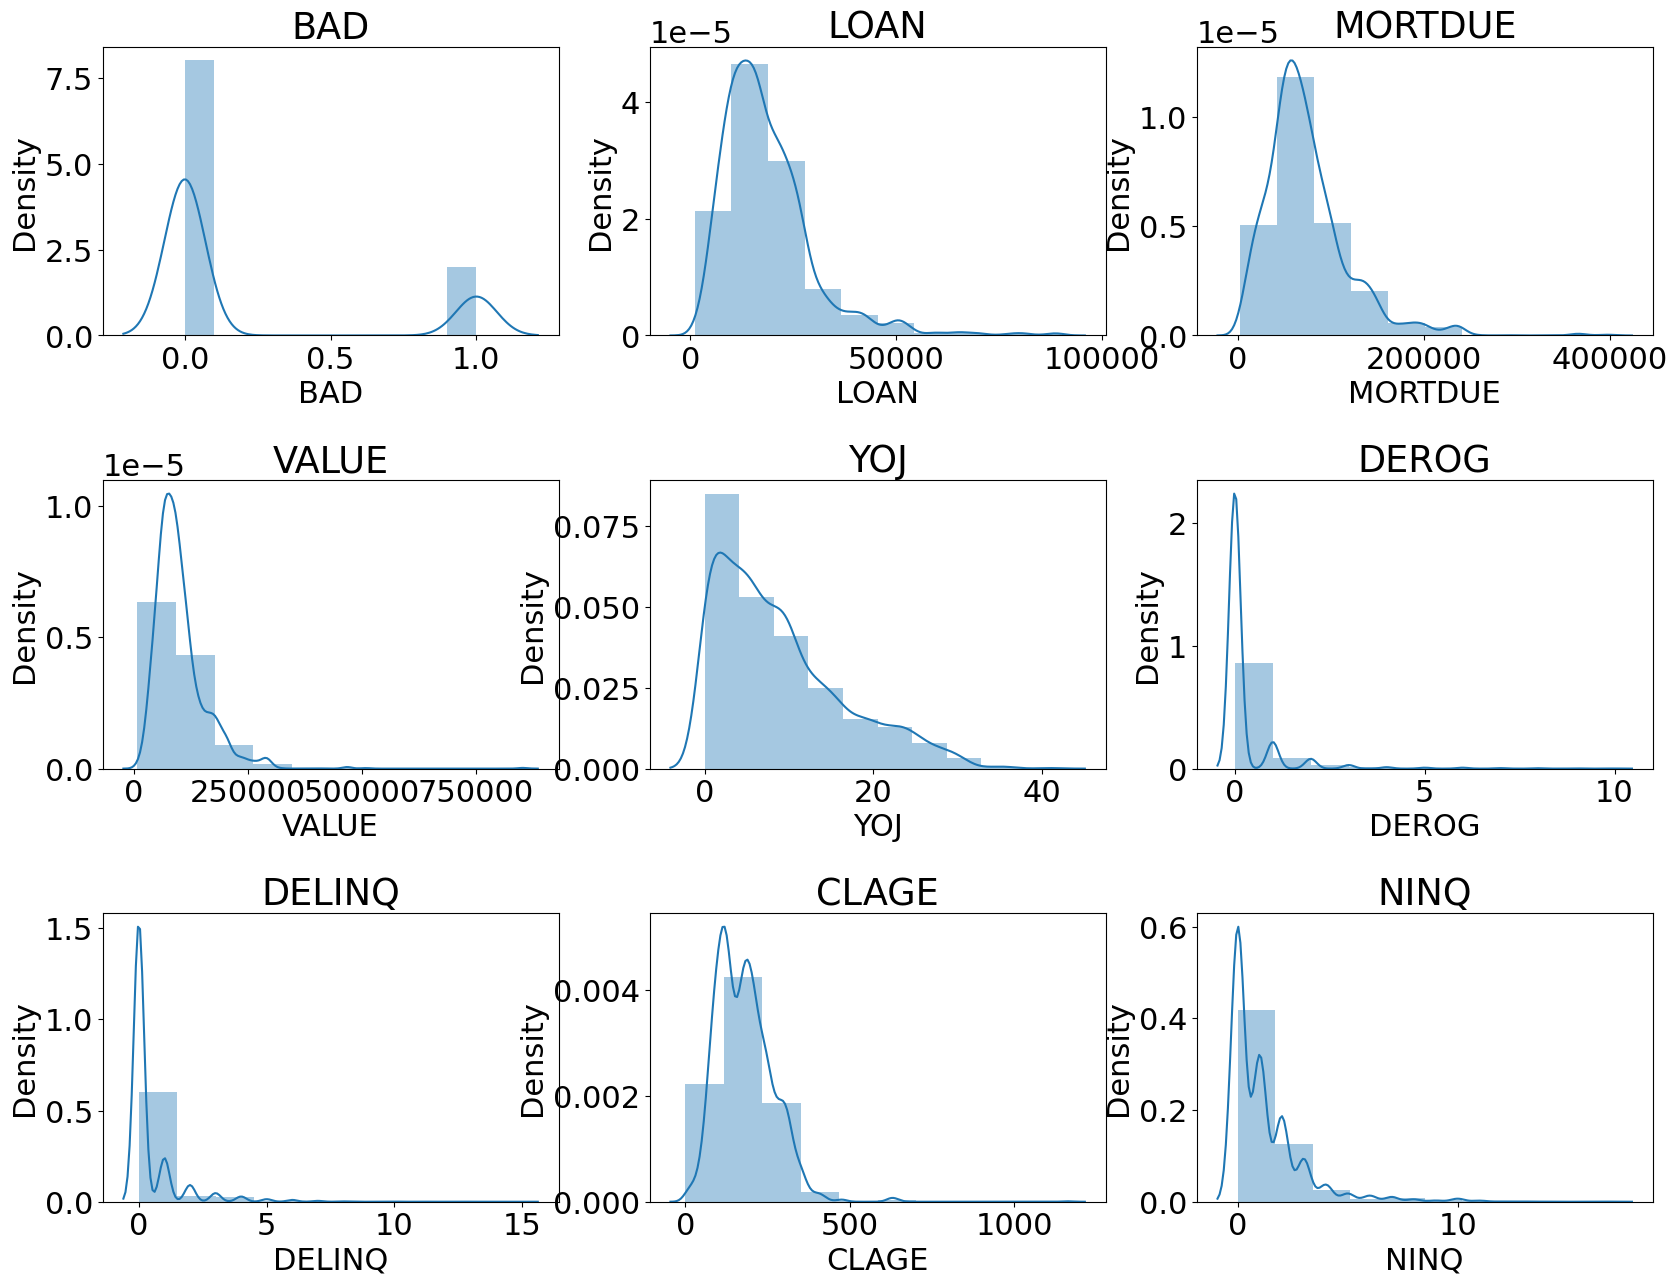

In [5]:

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

number of category field:  2


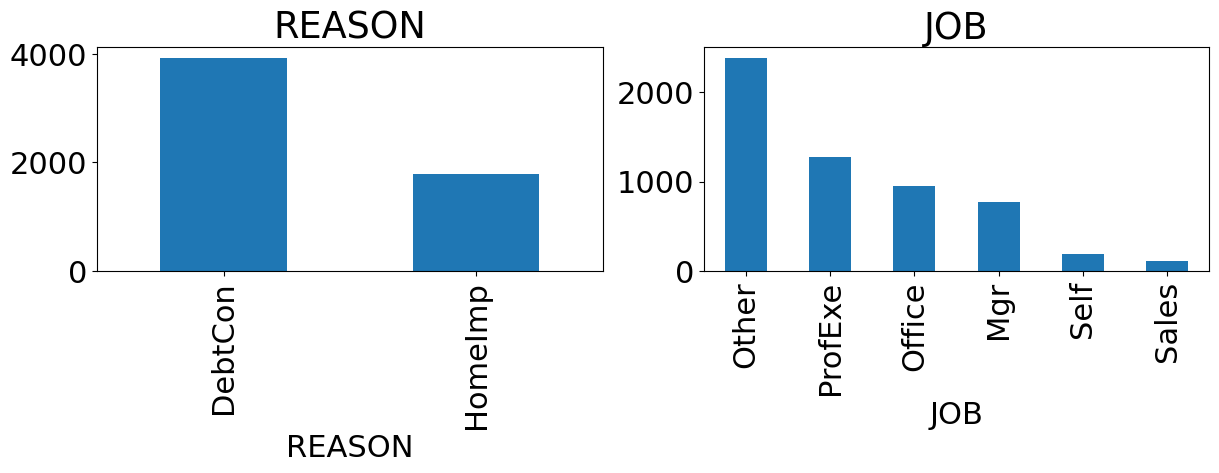

In [6]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

Phân chia tập huấn luyện/kiểm tra.

In [7]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


Xây dựng pipeline xử lý missing data và outliers.

In [8]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [9]:
cat_names

['REASON', 'JOB']

In [10]:
num_names

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [11]:
# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

cat_pl

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder())])

In [12]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)
num_pl

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=7)),
                ('scaler', MinMaxScaler())])

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                                  'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
                                  'DEBTINC']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['REASON', 'JOB'])])

Huấn luyện mô hình trên tập huấn luyện và đánh giá trên tập kiểm tra. Ở bước này chúng ta lưu ý một chút về các lựa chọn của LogisticRegression.

```
LogisticRegression(penalty='l2',
tol=0.0001, 
C=1.0, 
fit_intercept=True, 
class_weight=None, 
solver='lbfgs', 
max_iter=100)
```
Trong đó:

* `tot` là giá trị bao dung (_tolarance_) để dừng cập nhật gradient descent nếu khoảng thay đổi của hàm mất mát sau một bước huấn luyện nhỏ hơn `tot`.
* `max_iter` là số lượt huấn luyện tối đa.
* `fit_intercept` để qui định có sử dụng trọng số tự do (chính là $w_0$ không bị phụ thuộc vào dữ liệu) hay không.
* `solver` là phương pháp để giải bài toán tối ưu đối với cross entropy. Trong đó có: `liblinear, sag, saga, newton-cg`. Đối với dữ liệu kích thước nhỏ thì `liblinear` sử dụng sẽ phù hợp hơn. Trái lại `sag`, `saga` có tốc độ huấn luyện nhanh hơn cho dữ liệu lớn.
* `penalty`: là dạng hàm được sử dụng làm thành phần điều chuẩn (_regularization term_).
* `C`: Hệ số nhân của thành phần điều chuẩn.
* `class_weight`: Trọng số được nhân thêm ở mỗi nhóm. Thường được sử dụng trong trường hợp mẫu mất cân bằng giữa các nhóm để dự báo nhóm thiểu số tốt hơn. Trong số có tác dụng điều chỉnh mức độ phạt nếu dự báo sai một mẫu theo nhãn ground truth của mẫu. Nếu không được xác định thì ta hiểu trọng số nhóm là cân bằng.

In [14]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", LogisticRegression(penalty='l2', C=0.5, max_iter=200, class_weight={0 : 0.3, 1 : 0.7}))
    ]
)

# training
completed_pl.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['REASON', 'JOB'])])),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight={0: 0.3, 1: 0.7},
                                    max_iter=200))])

In [15]:

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 0.82
Accuracy on test: 0.82


Kết quả mô hình đạt accuracy là 83% trên tập huấn luyện và 82% trên tập kiểm tra. Đây là một kết quả không quá chênh lệch giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định. Phương pháp hồi qui Logistic thường là phương pháp đơn giản nhất trong các lớp mô hình hồi qui nên kết quả của nó thường không phải là tốt nhất. Bạn đọc nên thử nghiệm với nhiều lớp mô hình khác như `SVM, MLP, kNN, Random Forest, CART, Decision Tree` để tìm ra lớp mô hình tốt nhất.

# 3. Tổng kết

Như vậy ở bài này mình các bạn đã được làm quen với mô hình hồi qui Logistic trong bài toán phân loại nhị phân thuộc lớp mô hình học có giám sát cùng những khái nhiệm liên quan như hàm Sigmoid, _ước lượng hợp lý tối đa_, hàm Cross Entropy, phương pháp cập nhật nghiệm bằng gradient descent. Đây là những nội dung cơ bản nhưng lại rất quan trọng mà các bạn cần nắm vững để tạo tiền đề học tập và nghiên cứu những phương pháp học máy nâng cao hơn.

# Tài liệu tham khảo

1. [Logistic Regression - Joparga Standford](https://joparga3.github.io/standford_logistic_regression/)
2. [Logistic Regression - Jurafsky](https://web.stanford.edu/~jurafsky/slp3/5.pdf)
3. [CS109 - Logistic Regression - StandFord](https://web.stanford.edu/class/archive/cs/cs109/cs109.1176/lectures/23-LogisticRegression.pdf)
4. [Bishop Pattern Recognition and Machine Learning - 2006](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
5. [C229 - Andrew Ng - Lecture Note](https://datajobs.com/data-science-repo/Generalized-Linear-Models-[Andrew-Ng].pdf)